In [47]:
from bs4 import BeautifulSoup
import pandas as pd
import requests

In [48]:
website='https://www.cars24.com/buy-used-car?f=make%3A%3D%3Ajeep&sort=bestmatch&serveWarrantyCount=true&gaId=1225768733.1720324952&search=Jeep&listingSource=Search_LP&storeCityId=2378'

In [49]:
response = requests.get(website)

In [50]:
response.status_code

200

In [51]:
html = response.text  # Extract the HTML content from the response
soup = BeautifulSoup(html, 'html.parser')

In [52]:
cars = soup.find_all('div',{'class':"_2YB7p"})
print("Total available used cars for jeep in mumbai is: ",len(cars))

Total available used cars for jeep in mumbai is:  8


In [53]:
Year_of_Manufacture = []
Car_Name = []

for i in range(len(cars)):
    temp = cars[i].find('h3').get_text().split(' ')
    Year_of_Manufacture.append(temp[0])
    Car_Name.append(' '.join(temp[1:]))

In [54]:
Kilometers_Driven = []
Fuel_Type = []
Transmission = []

for i in range(len(cars)):
    temp = cars[i].find('ul',{'class':'_3J2G-'}).find_all('li')
    Kilometers_Driven.append(temp[0].get_text())
    Fuel_Type.append(temp[2].get_text())
    Transmission.append(temp[4].get_text())

In [55]:
Price = []

for i in range(len(cars)):
    Price.append(cars[i].find('strong',{'class':'_3RL-I'}))

In [56]:
DF = pd.DataFrame({'Car Name':Car_Name,'Year of Manufacture':Year_of_Manufacture,'Kilometers Driven':Kilometers_Driven,'Fuel Type':Fuel_Type,'Transmission':Transmission,'Price':Price})

In [57]:
DF.to_csv('Jeep_Cars24.csv')

In [58]:
DF

,Car Name,Year of Manufacture,Kilometers Driven,Fuel Type,Transmission,Price
0,Jeep Compass LIMITED (O) 2.0 DIESEL,2017,"99,924 km",Diesel,Manual,[₹9.46 Lakh]
1,Jeep Compass SPORT 1.4 PETROL,2019,"10,405 km",Petrol,Manual,[₹11.14 Lakh]
2,Jeep Compass LIMITED 2.0 DIESEL,2017,"66,096 km",Diesel,Manual,[₹9.32 Lakh]
3,Jeep Compass LIMITED PLUS PETROL AT,2019,"33,688 km",Petrol,Automatic,[₹14.82 Lakh]
4,Jeep Compass SPORT 1.4 PETROL DCT,2021,"21,250 km",Petrol,Automatic,[₹15.42 Lakh]
5,Jeep Compass LONGITUDE 2.0 DIESEL,2018,"44,734 km",Diesel,Manual,[₹10.19 Lakh]
6,Jeep Compass LIMITED (O) 1.4 PETROL AT,2018,"38,696 km",Petrol,Automatic,[₹12.89 Lakh]
7,Jeep Compass LIMITED PLUS PETROL AT,2019,"36,921 km",Petrol,Automatic,[₹15.02 Lakh]


In [59]:
df = pd.read_csv('Jeep_Cars24.csv')

In [60]:
df = df.drop(columns=['Unnamed: 0'])

In [61]:
df

,Car Name,Year of Manufacture,Kilometers Driven,Fuel Type,Transmission,Price
0,Jeep Compass LIMITED (O) 2.0 DIESEL,2017,"99,924 km",Diesel,Manual,"<strong class=""_3RL-I"">₹9.46 Lakh</strong>"
1,Jeep Compass SPORT 1.4 PETROL,2019,"10,405 km",Petrol,Manual,"<strong class=""_3RL-I"">₹11.14 Lakh</strong>"
2,Jeep Compass LIMITED 2.0 DIESEL,2017,"66,096 km",Diesel,Manual,"<strong class=""_3RL-I"">₹9.32 Lakh</strong>"
3,Jeep Compass LIMITED PLUS PETROL AT,2019,"33,688 km",Petrol,Automatic,"<strong class=""_3RL-I"">₹14.82 Lakh</strong>"
4,Jeep Compass SPORT 1.4 PETROL DCT,2021,"21,250 km",Petrol,Automatic,"<strong class=""_3RL-I"">₹15.42 Lakh</strong>"
5,Jeep Compass LONGITUDE 2.0 DIESEL,2018,"44,734 km",Diesel,Manual,"<strong class=""_3RL-I"">₹10.19 Lakh</strong>"
6,Jeep Compass LIMITED (O) 1.4 PETROL AT,2018,"38,696 km",Petrol,Automatic,"<strong class=""_3RL-I"">₹12.89 Lakh</strong>"
7,Jeep Compass LIMITED PLUS PETROL AT,2019,"36,921 km",Petrol,Automatic,"<strong class=""_3RL-I"">₹15.02 Lakh</strong>"


In [62]:
for i in range(len(df)):
    df['Car Name'][i]=df['Car Name'][i].replace('DIESEL','').replace('PETROL','')
    df['Kilometers Driven'][i]=df['Kilometers Driven'][i].replace(' km','').replace(',','')
    df['Price'][i]=df['Price'][i].replace('</strong>','').replace('<strong class="_3RL-I">','').replace('₹','').replace(' Lakh','')

C:\Users\Admin\AppData\Local\Temp\ipykernel_19980\1215333404.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Car Name'][i]=df['Car Name'][i].replace('DIESEL','').replace('PETROL','')
C:\Users\Admin\AppData\Local\Temp\ipykernel_19980\1215333404.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Kilometers Driven'][i]=df['Kilometers Driven'][i].replace(' km','').replace(',','')
C:\Users\Admin\AppData\Local\Temp\ipykernel_19980\1215333404.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [63]:
df


,Car Name,Year of Manufacture,Kilometers Driven,Fuel Type,Transmission,Price
0,Jeep Compass LIMITED (O) 2.0,2017,99924,Diesel,Manual,9.46
1,Jeep Compass SPORT 1.4,2019,10405,Petrol,Manual,11.14
2,Jeep Compass LIMITED 2.0,2017,66096,Diesel,Manual,9.32
3,Jeep Compass LIMITED PLUS AT,2019,33688,Petrol,Automatic,14.82
4,Jeep Compass SPORT 1.4 DCT,2021,21250,Petrol,Automatic,15.42
5,Jeep Compass LONGITUDE 2.0,2018,44734,Diesel,Manual,10.19
6,Jeep Compass LIMITED (O) 1.4 AT,2018,38696,Petrol,Automatic,12.89
7,Jeep Compass LIMITED PLUS AT,2019,36921,Petrol,Automatic,15.02


In [64]:
df.rename(columns={'Price':'Price(in Lakhs)'},inplace=True)
df.rename(columns={'Kilometers Driven':'Kilometers Driven(in km)'},inplace=True)

In [65]:
df.dtypes

Car Name                    object
Year of Manufacture          int64
Kilometers Driven(in km)    object
Fuel Type                   object
Transmission                object
Price(in Lakhs)             object
dtype: object

In [66]:
df['Kilometers Driven(in km)']=df['Kilometers Driven(in km)'].astype(int)
df['Price(in Lakhs)']=df['Price(in Lakhs)'].astype(float)

In [67]:
df.dtypes

Car Name                     object
Year of Manufacture           int64
Kilometers Driven(in km)      int32
Fuel Type                    object
Transmission                 object
Price(in Lakhs)             float64
dtype: object

In [68]:
df.to_csv('Jeep_Cars24_cleaned.csv')

In [69]:
df.dtypes

Car Name                     object
Year of Manufacture           int64
Kilometers Driven(in km)      int32
Fuel Type                    object
Transmission                 object
Price(in Lakhs)             float64
dtype: object

## Data Analysis

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
df = pd.read_csv('Jeep_Cars24_cleaned.csv')

In [72]:
df.head()

,Unnamed: 0,Car Name,Year of Manufacture,Kilometers Driven(in km),Fuel Type,Transmission,Price(in Lakhs)
0,0,Jeep Compass LIMITED (O) 2.0,2017,99924,Diesel,Manual,9.46
1,1,Jeep Compass SPORT 1.4,2019,10405,Petrol,Manual,11.14
2,2,Jeep Compass LIMITED 2.0,2017,66096,Diesel,Manual,9.32
3,3,Jeep Compass LIMITED PLUS AT,2019,33688,Petrol,Automatic,14.82
4,4,Jeep Compass SPORT 1.4 DCT,2021,21250,Petrol,Automatic,15.42


In [73]:
df.describe()

,Unnamed: 0,Year of Manufacture,Kilometers Driven(in km),Price(in Lakhs)
count,8.00000,8.000000,8.000000,8.000000
mean,3.50000,2018.500000,43964.250000,12.282500
std,2.44949,1.309307,27895.273664,2.579384
min,0.00000,2017.000000,10405.000000,9.320000
25%,1.75000,2017.750000,30578.500000,10.007500
50%,3.50000,2018.500000,37808.500000,12.015000
75%,5.25000,2019.000000,50074.500000,14.870000
max,7.00000,2021.000000,99924.000000,15.420000


In [74]:
#Descriptive Statistics
summary_stats = df.describe()
print("Summary Statistics:")
print(summary_stats)

Summary Statistics:
       Unnamed: 0  Year of Manufacture  Kilometers Driven(in km)  \
count     8.00000             8.000000                  8.000000   
mean      3.50000          2018.500000              43964.250000   
std       2.44949             1.309307              27895.273664   
min       0.00000          2017.000000              10405.000000   
25%       1.75000          2017.750000              30578.500000   
50%       3.50000          2018.500000              37808.500000   
75%       5.25000          2019.000000              50074.500000   
max       7.00000          2021.000000              99924.000000   

       Price(in Lakhs)  
count         8.000000  
mean         12.282500  
std           2.579384  
min           9.320000  
25%          10.007500  
50%          12.015000  
75%          14.870000  
max          15.420000  


## Distribution Plots

In [76]:
plt.figure(figsize=(18, 5))


<Figure size 1296x360 with 0 Axes>

<Figure size 1296x360 with 0 Axes>

Text(0.5, 1.0, 'Distribution of Year of Manufacture')

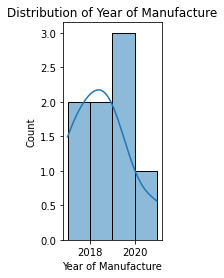

In [77]:
#Year of Manufacture
plt.subplot(1, 3, 1)
sns.histplot(df['Year of Manufacture'], kde=True)
plt.title('Distribution of Year of Manufacture')

Text(0.5, 1.0, 'Distribution of Kilometers Driven')

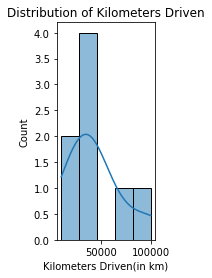

In [78]:
#Kilometers Driven(in km)
plt.subplot(1, 3, 2)
sns.histplot(df['Kilometers Driven(in km)'], kde=True)
plt.title('Distribution of Kilometers Driven')

In [79]:
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

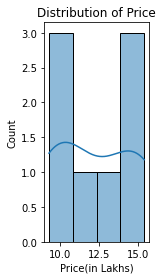

In [80]:
#Price(in Lakhs)
plt.subplot(1, 3, 3)
sns.histplot(df['Price(in Lakhs)'], kde=True)
plt.title('Distribution of Price')

plt.tight_layout()
plt.show()

## Box Plots

In [82]:
plt.figure(figsize=(12, 6))

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

Text(0.5, 1.0, 'Price by Fuel Type')

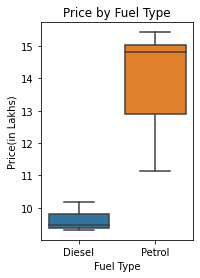

In [83]:
#Price by Fuel Type
plt.subplot(1, 2, 1)
sns.boxplot(x='Fuel Type', y='Price(in Lakhs)', data=df)
plt.title('Price by Fuel Type')

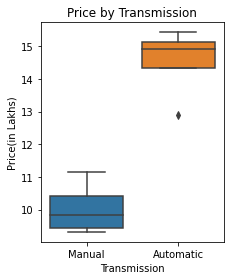

In [84]:
#Price by Transmission
plt.subplot(1, 2, 2)
sns.boxplot(x='Transmission', y='Price(in Lakhs)', data=df)
plt.title('Price by Transmission')

plt.tight_layout()
plt.show()

## Correlation Analysis

Correlation Matrix:
                          Kilometers Driven(in km)  Year of Manufacture  \
Kilometers Driven(in km)                  1.000000            -0.770983   
Year of Manufacture                      -0.770983             1.000000   
Price(in Lakhs)                          -0.608742             0.817667   

                          Price(in Lakhs)  
Kilometers Driven(in km)        -0.608742  
Year of Manufacture              0.817667  
Price(in Lakhs)                  1.000000  


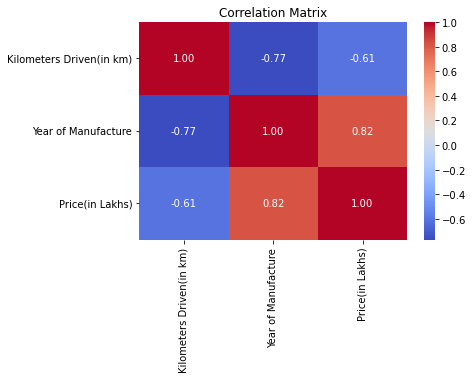

In [86]:
correlation_matrix = df[['Kilometers Driven(in km)', 'Year of Manufacture', 'Price(in Lakhs)']].corr()
print("Correlation Matrix:")
print(correlation_matrix)

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## Inference

In [87]:
print("\nInsights:")
print("- The average price of the cars is around", round(summary_stats['Price(in Lakhs)']['mean'], 2), "lakhs.")
print("- The dataset contains cars mainly from the years", df['Year of Manufacture'].min(), "to", df['Year of Manufacture'].max(), ".")
print("- Diesel cars have a different price distribution compared to petrol cars, as shown in the box plots.")
print("- Automatic and manual transmission cars also show different price distributions.")
print("- The correlation matrix shows the relationships between kilometers driven, year of manufacture, and price.")


Insights:
- The average price of the cars is around 12.28 lakhs.
- The dataset contains cars mainly from the years 2017 to 2021 .
- Diesel cars have a different price distribution compared to petrol cars, as shown in the box plots.
- Automatic and manual transmission cars also show different price distributions.
- The correlation matrix shows the relationships between kilometers driven, year of manufacture, and price.
